In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [2]:
df_modified=pd.read_csv("D:\Fall 2020\Data Visualization\Project\modified data.csv")
df_modified.head()

day  week_number        date  forecast_temperature_celsius  \
0  Wednesday            2  10/28/2020                            28   
1   Thursday            2  10/29/2020                            28   
2     Friday            2  10/30/2020                            28   
3   Saturday            2  10/31/2020                            27   
4     Sunday            2   11/1/2020                            26   

   predicted_daily_energy_consumption_watt_per_hour  actual_temp  \
0                                              10.0           28   
1                                              10.0           28   
2                                              10.0           28   
3                                              12.0           27   
4                                              14.0           26   

   actual_energy_consumption  
0                         13  
1                          5  
2                          6  
3                          8  
4                         10

In [3]:
names={"actual_temp":"actual_temperature_celsius","actual_energy_consumption":"actual_daily_energy_consumption_watt_per_hour"}
df_modified.rename(columns=names,inplace=True)

In [4]:
df_modified.head()

day  week_number        date  forecast_temperature_celsius  \
0  Wednesday            2  10/28/2020                            28   
1   Thursday            2  10/29/2020                            28   
2     Friday            2  10/30/2020                            28   
3   Saturday            2  10/31/2020                            27   
4     Sunday            2   11/1/2020                            26   

   predicted_daily_energy_consumption_watt_per_hour  \
0                                              10.0   
1                                              10.0   
2                                              10.0   
3                                              12.0   
4                                              14.0   

   actual_temperature_celsius  actual_daily_energy_consumption_watt_per_hour  
0                          28                                             13  
1                          28                                              5  
2                          28                                              6  
3                          27                                              8  
4                          26                                             10

In [5]:
df_energy=pd.read_csv("D:\\Fall 2020\\Data Visualization\\Project\\df energy.csv",encoding='latin-1')
df_energy.head()

ï..Day.Number  Week.Number        Day        Date    Month Time..pm.  \
0              1            1  Wednesday  10/21/2020  October      1:00   
1              2            1   Thursday  10/22/2020  October      1:00   
2              3            1     Friday  10/23/2020  October      1:00   
3              4            1   Saturday  10/24/2020  October      1:00   
4              5            1     Sunday  10/25/2020  October      1:00   

   Temperature.celsius.  Meter.Reading..watt.hour.  energy_consumption  
0                    31                      83735                   0  
1                    31                      83745                  10  
2                    31                      83750                   5  
3                    27                      83763                  13  
4                    27                      83783                  20

### Time Series of The Actual Daily Energy Consumption of the  Whole Month

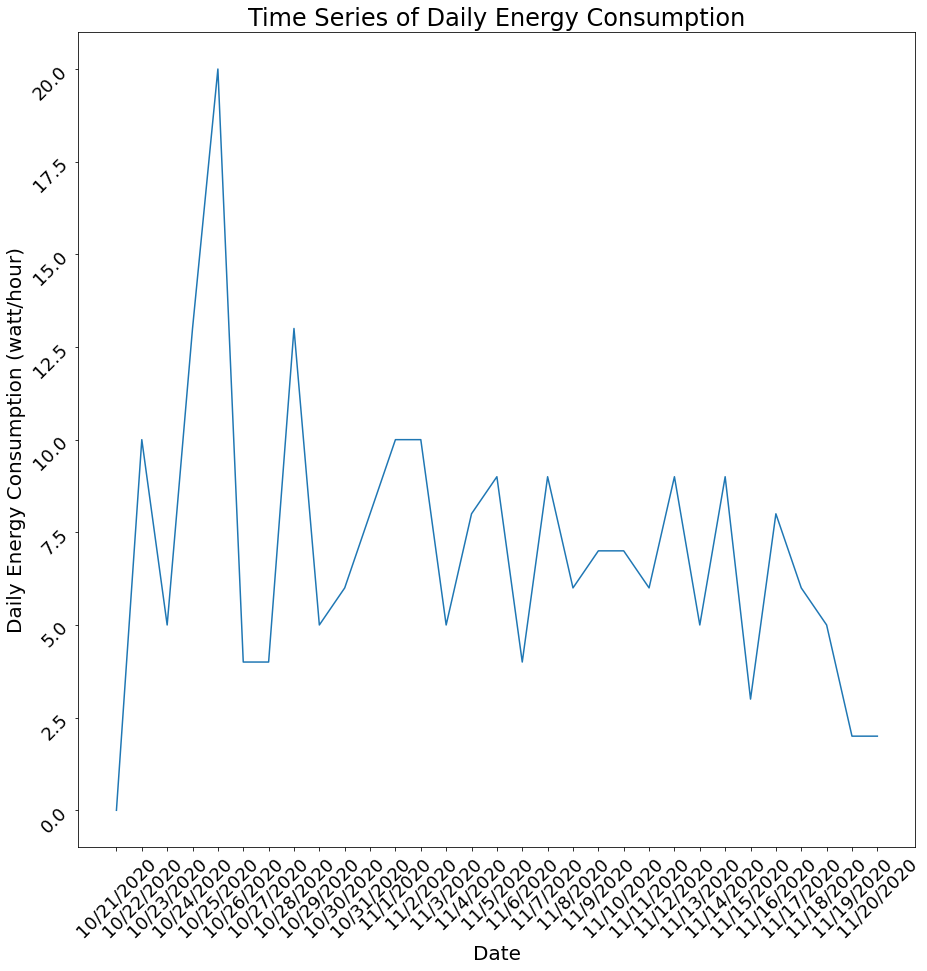

In [6]:
fig=plt.figure(figsize=(15,15))
plt.plot(df_energy["Date"],df_energy["energy_consumption"])
plt.xlabel("Date",size=20)
plt.ylabel("Daily Energy Consumption (watt/hour)",size=20)
plt.title("Time Series of Daily Energy Consumption",size=24)
plt.xticks(rotation=45,size=18)
plt.yticks(rotation=45,size=18)
plt.show()

# Forecasting Data:-

### Scatter Plot Between Temperature and Daily Energy Consumption of Week 1

In [7]:
df_week1=df_energy.loc[df_energy["Week.Number"]==1]
df_week1

ï..Day.Number  Week.Number        Day        Date    Month Time..pm.  \
0              1            1  Wednesday  10/21/2020  October      1:00   
1              2            1   Thursday  10/22/2020  October      1:00   
2              3            1     Friday  10/23/2020  October      1:00   
3              4            1   Saturday  10/24/2020  October      1:00   
4              5            1     Sunday  10/25/2020  October      1:00   
5              6            1     Monday  10/26/2020  October      1:00   
6              7            1    Tuesday  10/27/2020  October      1:00   

   Temperature.celsius.  Meter.Reading..watt.hour.  energy_consumption  
0                    31                      83735                   0  
1                    31                      83745                  10  
2                    31                      83750                   5  
3                    27                      83763                  13  
4                    27                      83783                  20  
5                    28                      83787                   4  
6                    28                      83791                   4

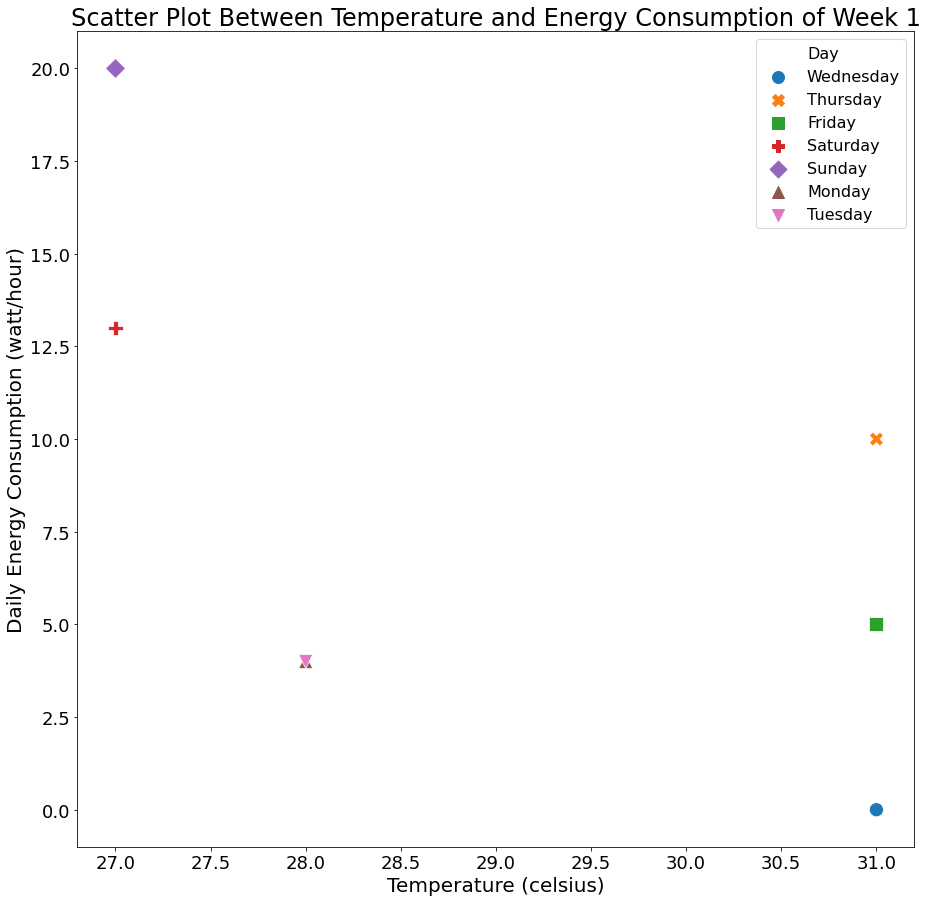

In [8]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_week1, x="Temperature.celsius.", y="energy_consumption", hue= "Day",style="Day",s=200)
#sns.color_palette("viridis")
plt.xlabel("Temperature (celsius)",size=20)
plt.ylabel("Daily Energy Consumption (watt/hour)",size=20)
plt.title("Scatter Plot Between Temperature and Energy Consumption of Week 1",size=24)
plt.xticks(size=18)
plt.yticks(size=18)
plt.legend(fontsize=16,markerscale=2)
plt.show()

### Scatter Plot Between Temperature and Daily Energy Consumption of Week 1 With The Regression Line

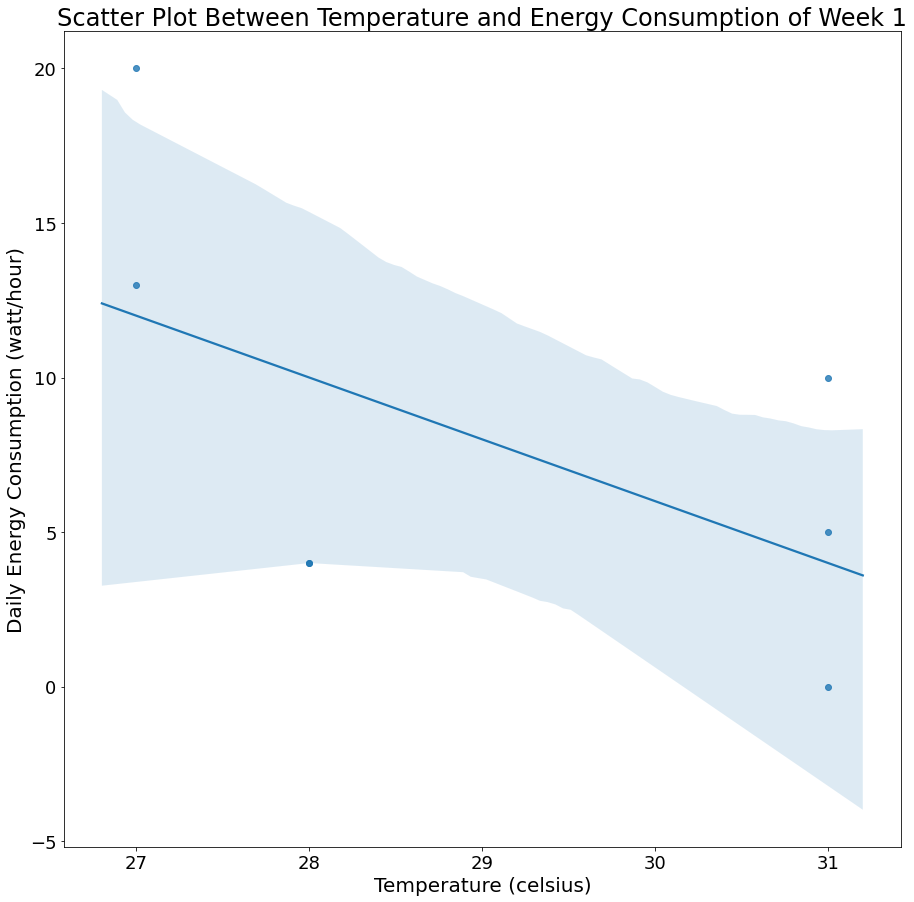

In [9]:
plt.figure(figsize=(15,15))
sns.regplot(x="Temperature.celsius.", y="energy_consumption",data=df_week1)
plt.title("Scatter Plot of Temperature and Energy Consumption",fontsize=24)
plt.xlabel("Temperature (celsius)",size=20)
plt.ylabel("Daily Energy Consumption (watt/hour)",size=20)
plt.title("Scatter Plot Between Temperature and Energy Consumption of Week 1",size=24)
plt.xticks(size=18)
plt.yticks(size=18)
plt.show()

#### For each of weeks 2,3,4 and the three days of week 5, there will be two plots: the first showing the time series of the predicted daily energy consumption against the actual data. The second showing the scatter plot between temperature and the daily energy consumption of the predicted data against the actual data. From these graphs, observations and interpretations will be done to analyze the data.

### Week 2:

The first step is to create a data frame that include data of week 2 only.

In [10]:
df_week2=df_modified.loc[df_modified["week_number"]==2]
df_week2

day  week_number        date  forecast_temperature_celsius  \
0  Wednesday            2  10/28/2020                            28   
1   Thursday            2  10/29/2020                            28   
2     Friday            2  10/30/2020                            28   
3   Saturday            2  10/31/2020                            27   
4     Sunday            2   11/1/2020                            26   
5     Monday            2   11/2/2020                            26   
6    Tuesday            2   11/3/2020                            25   

   predicted_daily_energy_consumption_watt_per_hour  \
0                                              10.0   
1                                              10.0   
2                                              10.0   
3                                              12.0   
4                                              14.0   
5                                              14.0   
6                                              16.0   

   actual_temperature_celsius  actual_daily_energy_consumption_watt_per_hour  
0                          28                                             13  
1                          28                                              5  
2                          28                                              6  
3                          27                                              8  
4                          26                                             10  
5                          26                                             10  
6                          25                                              5

##### Time Series of The Predicted Daily Energy Consumption Against The Actual Data

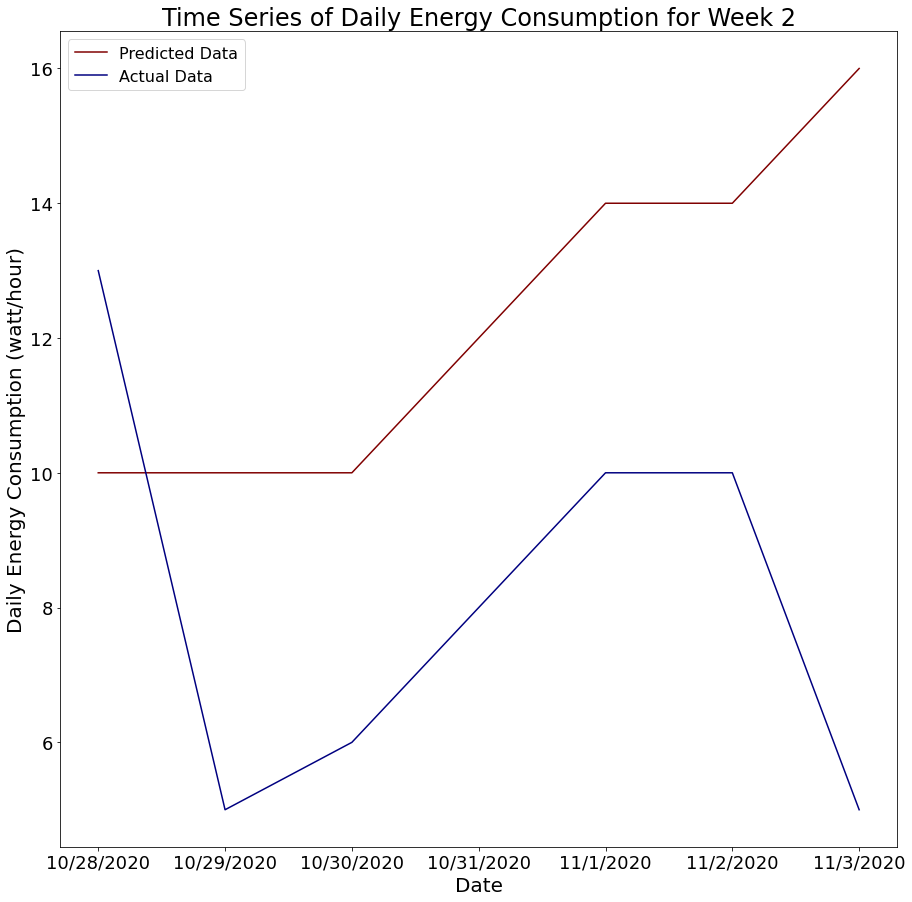

In [11]:
plt.figure(figsize=(15,15))
plt.plot(df_week2["date"], df_week2['predicted_daily_energy_consumption_watt_per_hour'], label = "Predicted Data",c="maroon")
plt.plot(df_week2["date"], df_week2['actual_daily_energy_consumption_watt_per_hour'], label = "Actual Data",c="navy")
plt.xlabel("Date",size=20)
plt.ylabel("Daily Energy Consumption (watt/hour)",size=20)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Time Series of Daily Energy Consumption for Week 2",size=24)
plt.legend(fontsize=16)
plt.show()

##### Scatter Plot Between The Temperature and The Daily Energy Consumption

Some manipulation will take place in order to use the type of data (predicted or actual) as hue

In [12]:
df_week2["forecast_temperature_celsius"].equals(df_week2["actual_temperature_celsius"])

True

The code above shows that the forecast temperature and the actual temperature have the same values. Now, we will add a new column named type of data (it will be either predicted or actual) and both columns predicted_daily_energy_consumption_watt_per_hour and actual_daily_energy_consumption_watt_per_hour will be placed in the same column with with respective to the rest of data. There will be duplication in some columns, but this data frame will be used to get scatter plot that includes both the predicted and actual daily energy consumption.

In [13]:
df_week2_new=df_week2
predicted=df_week2_new["predicted_daily_energy_consumption_watt_per_hour"]
actual=df_week2_new["actual_daily_energy_consumption_watt_per_hour"]
df_week2_new.drop(columns=["predicted_daily_energy_consumption_watt_per_hour","actual_daily_energy_consumption_watt_per_hour"],inplace=True)

C:\Users\monaa\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
df_week2_new

day  week_number        date  forecast_temperature_celsius  \
0  Wednesday            2  10/28/2020                            28   
1   Thursday            2  10/29/2020                            28   
2     Friday            2  10/30/2020                            28   
3   Saturday            2  10/31/2020                            27   
4     Sunday            2   11/1/2020                            26   
5     Monday            2   11/2/2020                            26   
6    Tuesday            2   11/3/2020                            25   

   actual_temperature_celsius  
0                          28  
1                          28  
2                          28  
3                          27  
4                          26  
5                          26  
6                          25

Since both the forecast temperature and actual temperature have the same values, the two columns can remain in the data fram or one can be dropped to reduce redundant data.

In [15]:
df_week2_new.drop(columns=["forecast_temperature_celsius"],inplace=True)
df_week2_new

day  week_number        date  actual_temperature_celsius
0  Wednesday            2  10/28/2020                          28
1   Thursday            2  10/29/2020                          28
2     Friday            2  10/30/2020                          28
3   Saturday            2  10/31/2020                          27
4     Sunday            2   11/1/2020                          26
5     Monday            2   11/2/2020                          26
6    Tuesday            2   11/3/2020                          25

In [16]:
daily_energy_consumption = [*predicted, *actual]
daily_energy_consumption

[9.999999999999991,
 9.999999999999991,
 9.999999999999991,
 12.0,
 14.0,
 14.0,
 16.0,
 13,
 5,
 6,
 8,
 10,
 10,
 5]

The first 7 numbers are the predicted daily energy consumption starting from Wednesday to Tuesday respectively.The last 7 numbers are the actual daily energy consumption starting from Wednesday to Tuesday respectively.

In [17]:
type_data=np.array([])
for i in np.arange(7):
    type_data=np.append(type_data,"predicted")
for i in np.arange(7):
    type_data=np.append(type_data,"actual")

Now, we should replicate the rows in df_week2_new so that the first 7 rows are for predicted and the last 7 are for the actual data.

In [18]:
df_week2_new = pd.concat([df_week2_new, df_week2_new])
df_week2_new.reset_index(drop=True)

day  week_number        date  actual_temperature_celsius
0   Wednesday            2  10/28/2020                          28
1    Thursday            2  10/29/2020                          28
2      Friday            2  10/30/2020                          28
3    Saturday            2  10/31/2020                          27
4      Sunday            2   11/1/2020                          26
5      Monday            2   11/2/2020                          26
6     Tuesday            2   11/3/2020                          25
7   Wednesday            2  10/28/2020                          28
8    Thursday            2  10/29/2020                          28
9      Friday            2  10/30/2020                          28
10   Saturday            2  10/31/2020                          27
11     Sunday            2   11/1/2020                          26
12     Monday            2   11/2/2020                          26
13    Tuesday            2   11/3/2020                          25

In [19]:
df_week2_new.insert(4,"daily_energy_consumption_watt_per_hour",daily_energy_consumption)

In [20]:
df_week2_new.insert(5,"type_data",type_data)

In [21]:
df_week2_new

day  week_number        date  actual_temperature_celsius  \
0  Wednesday            2  10/28/2020                          28   
1   Thursday            2  10/29/2020                          28   
2     Friday            2  10/30/2020                          28   
3   Saturday            2  10/31/2020                          27   
4     Sunday            2   11/1/2020                          26   
5     Monday            2   11/2/2020                          26   
6    Tuesday            2   11/3/2020                          25   
0  Wednesday            2  10/28/2020                          28   
1   Thursday            2  10/29/2020                          28   
2     Friday            2  10/30/2020                          28   
3   Saturday            2  10/31/2020                          27   
4     Sunday            2   11/1/2020                          26   
5     Monday            2   11/2/2020                          26   
6    Tuesday            2   11/3/2020                          25   

   daily_energy_consumption_watt_per_hour  type_data  
0                                    10.0  predicted  
1                                    10.0  predicted  
2                                    10.0  predicted  
3                                    12.0  predicted  
4                                    14.0  predicted  
5                                    14.0  predicted  
6                                    16.0  predicted  
0                                    13.0     actual  
1                                     5.0     actual  
2                                     6.0     actual  
3                                     8.0     actual  
4                                    10.0     actual  
5                                    10.0     actual  
6                                     5.0     actual

In [22]:
names={"actual_temperature_celsius":"temperature_celsius"}

In [23]:
df_week2_new.rename(columns=names,inplace=True)

Now, we can use the data frame df_week2_new to get a scatter plot that includes both the predicted and actual daily energy consumption

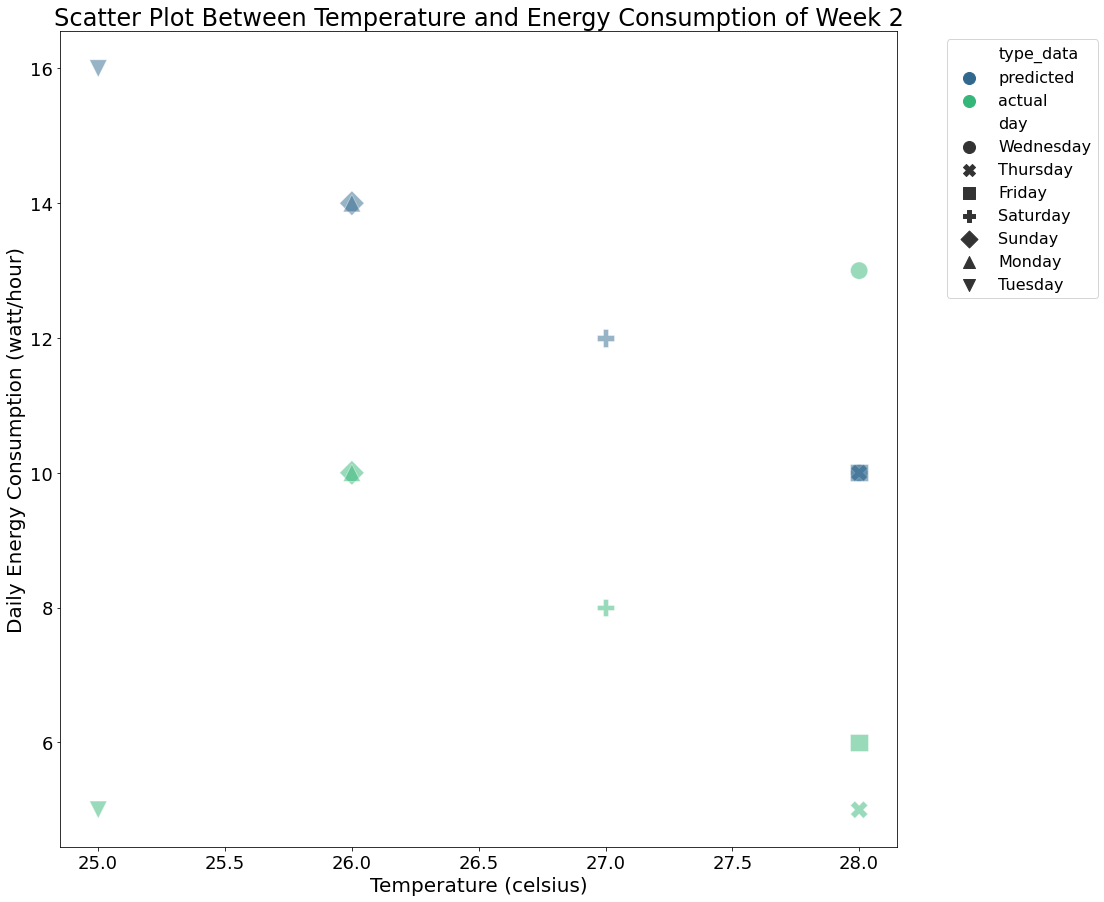

In [24]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_week2_new, x="temperature_celsius", y="daily_energy_consumption_watt_per_hour",palette="viridis",alpha=0.5 ,hue="type_data",style="day",s=300)
plt.xlabel("Temperature (celsius)",size=20)
plt.ylabel("Daily Energy Consumption (watt/hour)",size=20)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Scatter Plot Between Temperature and Energy Consumption of Week 2",size=24)
plt.legend( bbox_to_anchor=(1.05, 1),fontsize=16,markerscale=2)
plt.show()

### Week 3:

The first step is to create a data frame that include data of week 3 only.

In [25]:
df_week3=df_modified.loc[df_modified["week_number"]==3]
df_week3

day  week_number        date  forecast_temperature_celsius  \
7   Wednesday            3   11/4/2020                            25   
8    Thursday            3   11/5/2020                            25   
9      Friday            3   11/6/2020                            24   
10   Saturday            3   11/7/2020                            24   
11     Sunday            3   11/8/2020                            23   
12     Monday            3   11/9/2020                            23   
13    Tuesday            3  11/10/2020                            25   

    predicted_daily_energy_consumption_watt_per_hour  \
7                                          10.750381   
8                                          10.750381   
9                                          11.665145   
10                                         11.665145   
11                                         12.579909   
12                                         12.579909   
13                                         10.750381   

    actual_temperature_celsius  actual_daily_energy_consumption_watt_per_hour  
7                           25                                              8  
8                           25                                              9  
9                           24                                              4  
10                          24                                              9  
11                          23                                              6  
12                          23                                              7  
13                          25                                              7

##### Time Series of The Predicted Daily Energy Consumption Against The Actual Data

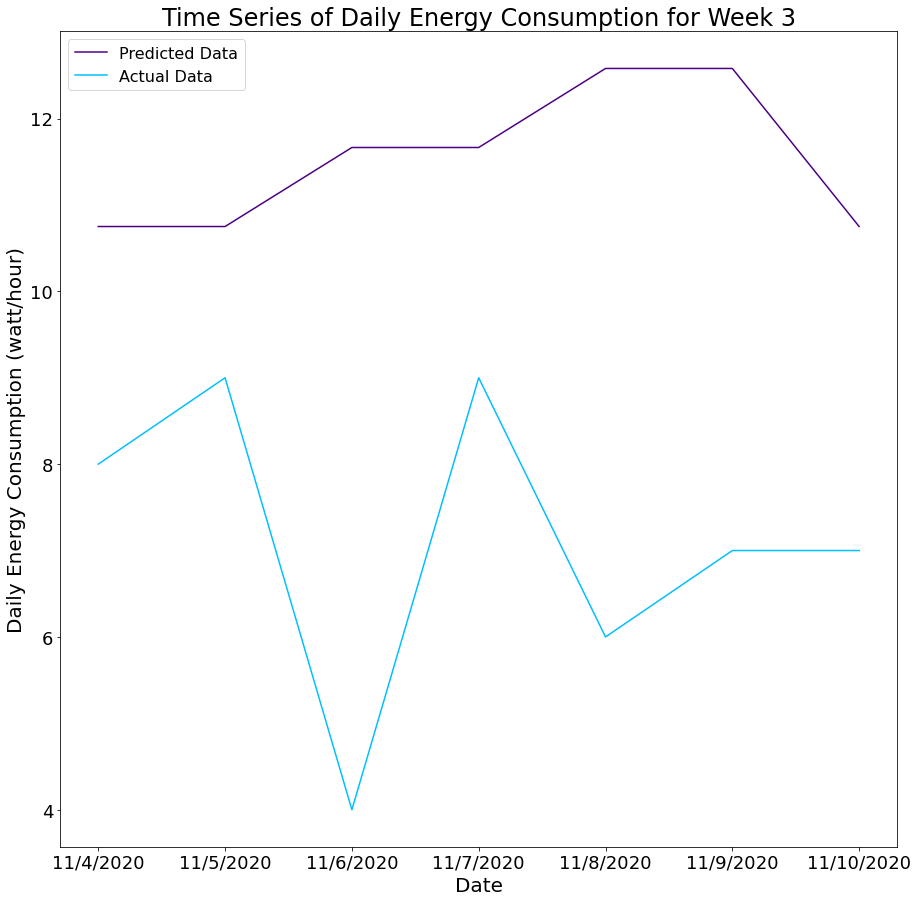

In [26]:
plt.figure(figsize=(15,15))
plt.plot(df_week3["date"], df_week3['predicted_daily_energy_consumption_watt_per_hour'], label = "Predicted Data",c="indigo")
plt.plot(df_week3["date"], df_week3['actual_daily_energy_consumption_watt_per_hour'], label = "Actual Data",c="deepskyblue")
plt.xlabel("Date",size=20)
plt.ylabel("Daily Energy Consumption (watt/hour)",size=20)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Time Series of Daily Energy Consumption for Week 3",size=24)
plt.legend(fontsize=16)
plt.show()

##### Scatter Plot Between The Temperature and The Daily Energy Consumption

Some manipulation will take place in order to use the type of data (predicted or actual) as hue

In [27]:
df_week3["forecast_temperature_celsius"].equals(df_week3["actual_temperature_celsius"])

True

The code above shows that the forecast temperature and the actual temperature have the same values. Now, we will add a new column named type of data (it will be either predicted or actual) and both columns predicted_daily_energy_consumption_watt_per_hour and actual_daily_energy_consumption_watt_per_hour will be placed in the same column with with respective to the rest of data. There will be duplication in some columns, but this data frame will be used to get scatter plot that includes both the predicted and actual daily energy consumption.

In [28]:
df_week3_new=df_week3
predicted=df_week3_new["predicted_daily_energy_consumption_watt_per_hour"]
actual=df_week3_new["actual_daily_energy_consumption_watt_per_hour"]
df_week3_new.drop(columns=["predicted_daily_energy_consumption_watt_per_hour","actual_daily_energy_consumption_watt_per_hour"],inplace=True)

C:\Users\monaa\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
df_week3_new

day  week_number        date  forecast_temperature_celsius  \
7   Wednesday            3   11/4/2020                            25   
8    Thursday            3   11/5/2020                            25   
9      Friday            3   11/6/2020                            24   
10   Saturday            3   11/7/2020                            24   
11     Sunday            3   11/8/2020                            23   
12     Monday            3   11/9/2020                            23   
13    Tuesday            3  11/10/2020                            25   

    actual_temperature_celsius  
7                           25  
8                           25  
9                           24  
10                          24  
11                          23  
12                          23  
13                          25

Since both the forecast temperature and actual temperature have the same values, the two columns can remain in the data fram or one can be dropped to reduce redundant data.

In [30]:
df_week3_new.drop(columns=["forecast_temperature_celsius"],inplace=True)
df_week3_new

day  week_number        date  actual_temperature_celsius
7   Wednesday            3   11/4/2020                          25
8    Thursday            3   11/5/2020                          25
9      Friday            3   11/6/2020                          24
10   Saturday            3   11/7/2020                          24
11     Sunday            3   11/8/2020                          23
12     Monday            3   11/9/2020                          23
13    Tuesday            3  11/10/2020                          25

In [31]:
daily_energy_consumption = [*predicted, *actual]
daily_energy_consumption

[10.7503805175038,
 10.7503805175038,
 11.6651445966515,
 11.6651445966515,
 12.5799086757991,
 12.5799086757991,
 10.7503805175038,
 8,
 9,
 4,
 9,
 6,
 7,
 7]

The first 7 numbers are the predicted daily energy consumption starting from Wednesday to Tuesday respectively.The last 7 numbers are the actual daily energy consumption starting from Wednesday to Tuesday respectively.

In [32]:
type_data=np.array([])
for i in np.arange(7):
    type_data=np.append(type_data,"predicted")
for i in np.arange(7):
    type_data=np.append(type_data,"actual")

Now, we should replicate the rows in df_week3_new so that the first 7 rows are for predicted and the last 7 are for the actual data.

In [33]:
df_week3_new = pd.concat([df_week3_new, df_week3_new])
df_week3_new.reset_index(drop=True)

day  week_number        date  actual_temperature_celsius
0   Wednesday            3   11/4/2020                          25
1    Thursday            3   11/5/2020                          25
2      Friday            3   11/6/2020                          24
3    Saturday            3   11/7/2020                          24
4      Sunday            3   11/8/2020                          23
5      Monday            3   11/9/2020                          23
6     Tuesday            3  11/10/2020                          25
7   Wednesday            3   11/4/2020                          25
8    Thursday            3   11/5/2020                          25
9      Friday            3   11/6/2020                          24
10   Saturday            3   11/7/2020                          24
11     Sunday            3   11/8/2020                          23
12     Monday            3   11/9/2020                          23
13    Tuesday            3  11/10/2020                          25

In [34]:
df_week3_new.insert(4,"daily_energy_consumption_watt_per_hour",daily_energy_consumption)

In [35]:
df_week3_new.insert(5,"type_data",type_data)

In [36]:
df_week3_new

day  week_number        date  actual_temperature_celsius  \
7   Wednesday            3   11/4/2020                          25   
8    Thursday            3   11/5/2020                          25   
9      Friday            3   11/6/2020                          24   
10   Saturday            3   11/7/2020                          24   
11     Sunday            3   11/8/2020                          23   
12     Monday            3   11/9/2020                          23   
13    Tuesday            3  11/10/2020                          25   
7   Wednesday            3   11/4/2020                          25   
8    Thursday            3   11/5/2020                          25   
9      Friday            3   11/6/2020                          24   
10   Saturday            3   11/7/2020                          24   
11     Sunday            3   11/8/2020                          23   
12     Monday            3   11/9/2020                          23   
13    Tuesday            3  11/10/2020                          25   

    daily_energy_consumption_watt_per_hour  type_data  
7                                10.750381  predicted  
8                                10.750381  predicted  
9                                11.665145  predicted  
10                               11.665145  predicted  
11                               12.579909  predicted  
12                               12.579909  predicted  
13                               10.750381  predicted  
7                                 8.000000     actual  
8                                 9.000000     actual  
9                                 4.000000     actual  
10                                9.000000     actual  
11                                6.000000     actual  
12                                7.000000     actual  
13                                7.000000     actual

In [37]:
names={"actual_temperature_celsius":"temperature_celsius"}

In [38]:
df_week3_new.rename(columns=names,inplace=True)

Now, we can use the data frame df_week3_new to get a scatter plot that includes both the predicted and actual daily energy consumption

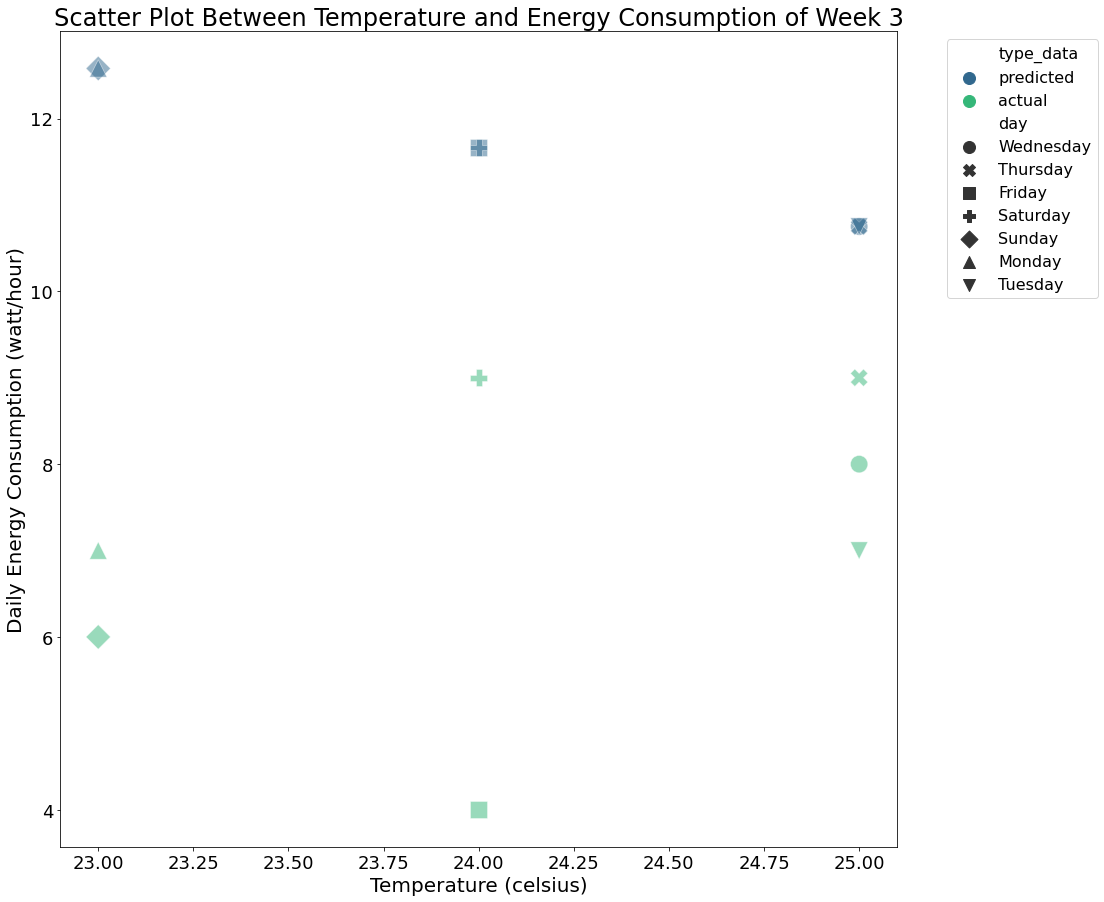

In [39]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_week3_new, x="temperature_celsius", y="daily_energy_consumption_watt_per_hour",palette="viridis",alpha=0.5 ,hue="type_data",style="day",s=300)
plt.xlabel("Temperature (celsius)",size=20)
plt.ylabel("Daily Energy Consumption (watt/hour)",size=20)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Scatter Plot Between Temperature and Energy Consumption of Week 3",size=24)
plt.legend( bbox_to_anchor=(1.05, 1),fontsize=16,markerscale=2)
plt.show()

### Week 4:

The first step is to create a data frame that include data of week 4 only.

In [40]:
df_week4=df_modified.loc[df_modified["week_number"]==4]
df_week4

day  week_number        date  forecast_temperature_celsius  \
14  Wednesday            4  11/11/2020                            24   
15   Thursday            4  11/12/2020                            25   
16     Friday            4  11/13/2020                            25   
17   Saturday            4  11/14/2020                            25   
18     Sunday            4  11/15/2020                            22   
19     Monday            4  11/16/2020                            22   
20    Tuesday            4  11/17/2020                            22   

    predicted_daily_energy_consumption_watt_per_hour  \
14                                          8.271268   
15                                          8.080257   
16                                          8.080257   
17                                          8.080257   
18                                          8.653291   
19                                          8.653291   
20                                          8.653291   

    actual_temperature_celsius  actual_daily_energy_consumption_watt_per_hour  
14                          24                                              6  
15                          25                                              9  
16                          25                                              5  
17                          25                                              9  
18                          22                                              3  
19                          22                                              8  
20                          22                                              6

##### Time Series of The Predicted Daily Energy Consumption Against The Actual Data

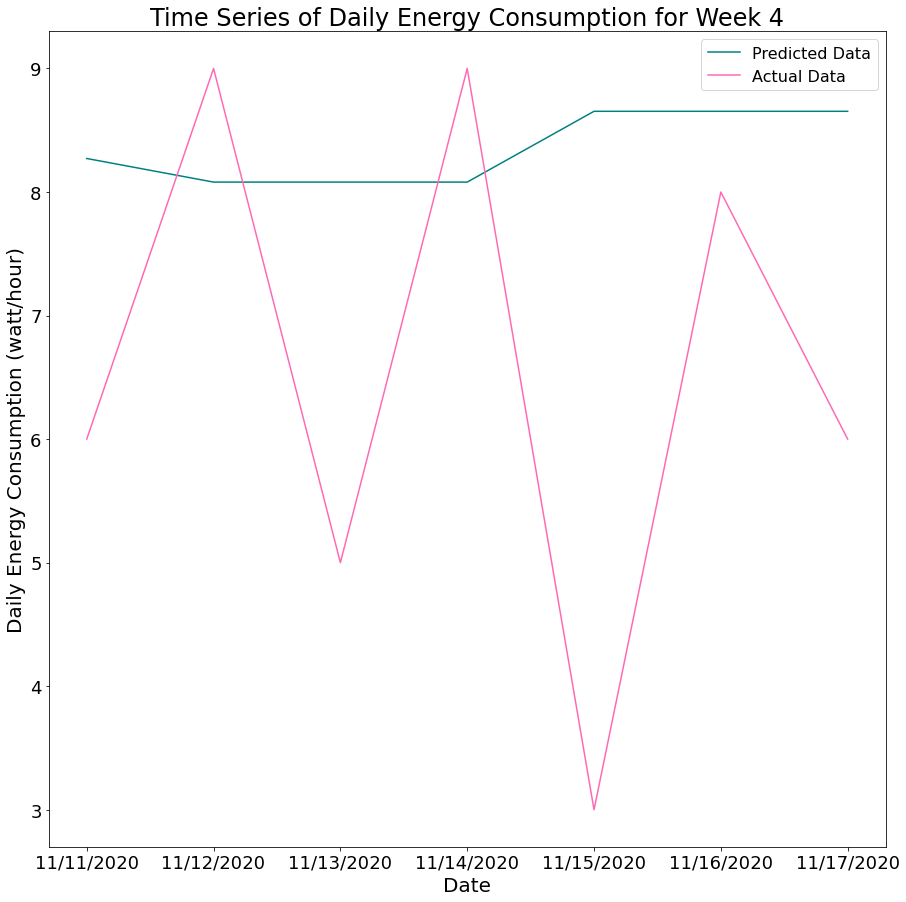

In [41]:
plt.figure(figsize=(15,15))
plt.plot(df_week4["date"], df_week4['predicted_daily_energy_consumption_watt_per_hour'], label = "Predicted Data",c="teal")
plt.plot(df_week4["date"], df_week4['actual_daily_energy_consumption_watt_per_hour'], label = "Actual Data",c="hotpink")
plt.xlabel("Date",size=20)
plt.ylabel("Daily Energy Consumption (watt/hour)",size=20)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Time Series of Daily Energy Consumption for Week 4",size=24)
plt.legend(fontsize=16)
plt.show()

##### Scatter Plot Between The Temperature and The Daily Energy Consumption

Some manipulation will take place in order to use the type of data (predicted or actual) as hue

In [42]:
df_week4["forecast_temperature_celsius"].equals(df_week4["actual_temperature_celsius"])

True

The code above shows that the forecast temperature and the actual temperature have the same values. Now, we will add a new column named type of data (it will be either predicted or actual) and both columns predicted_daily_energy_consumption_watt_per_hour and actual_daily_energy_consumption_watt_per_hour will be placed in the same column with with respective to the rest of data. There will be duplication in some columns, but this data frame will be used to get scatter plot that includes both the predicted and actual daily energy consumption.

In [43]:
df_week4_new=df_week4
predicted=df_week4_new["predicted_daily_energy_consumption_watt_per_hour"]
actual=df_week4_new["actual_daily_energy_consumption_watt_per_hour"]
df_week4_new.drop(columns=["predicted_daily_energy_consumption_watt_per_hour","actual_daily_energy_consumption_watt_per_hour"],inplace=True)

C:\Users\monaa\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
df_week4_new

day  week_number        date  forecast_temperature_celsius  \
14  Wednesday            4  11/11/2020                            24   
15   Thursday            4  11/12/2020                            25   
16     Friday            4  11/13/2020                            25   
17   Saturday            4  11/14/2020                            25   
18     Sunday            4  11/15/2020                            22   
19     Monday            4  11/16/2020                            22   
20    Tuesday            4  11/17/2020                            22   

    actual_temperature_celsius  
14                          24  
15                          25  
16                          25  
17                          25  
18                          22  
19                          22  
20                          22

Since both the forecast temperature and actual temperature have the same values, the two columns can remain in the data fram or one can be dropped to reduce redundant data.

In [45]:
df_week4_new.drop(columns=["forecast_temperature_celsius"],inplace=True)
df_week4_new

day  week_number        date  actual_temperature_celsius
14  Wednesday            4  11/11/2020                          24
15   Thursday            4  11/12/2020                          25
16     Friday            4  11/13/2020                          25
17   Saturday            4  11/14/2020                          25
18     Sunday            4  11/15/2020                          22
19     Monday            4  11/16/2020                          22
20    Tuesday            4  11/17/2020                          22

In [46]:
daily_energy_consumption = [*predicted, *actual]
daily_energy_consumption

[8.27126805778492,
 8.08025682182986,
 8.08025682182986,
 8.08025682182986,
 8.653290529695031,
 8.653290529695031,
 8.653290529695031,
 6,
 9,
 5,
 9,
 3,
 8,
 6]

The first 7 numbers are the predicted daily energy consumption starting from Wednesday to Tuesday respectively.The last 7 numbers are the actual daily energy consumption starting from Wednesday to Tuesday respectively

In [47]:
type_data=np.array([])
for i in np.arange(7):
    type_data=np.append(type_data,"predicted")
for i in np.arange(7):
    type_data=np.append(type_data,"actual")

Now, we should replicate the rows in df_week4_new so that the first 7 rows are for predicted and the last 7 are for the actual data.

In [48]:
df_week4_new = pd.concat([df_week4_new, df_week4_new])
df_week4_new.reset_index(drop=True)

day  week_number        date  actual_temperature_celsius
0   Wednesday            4  11/11/2020                          24
1    Thursday            4  11/12/2020                          25
2      Friday            4  11/13/2020                          25
3    Saturday            4  11/14/2020                          25
4      Sunday            4  11/15/2020                          22
5      Monday            4  11/16/2020                          22
6     Tuesday            4  11/17/2020                          22
7   Wednesday            4  11/11/2020                          24
8    Thursday            4  11/12/2020                          25
9      Friday            4  11/13/2020                          25
10   Saturday            4  11/14/2020                          25
11     Sunday            4  11/15/2020                          22
12     Monday            4  11/16/2020                          22
13    Tuesday            4  11/17/2020                          22

In [49]:
df_week4_new.insert(4,"daily_energy_consumption_watt_per_hour",daily_energy_consumption)

In [50]:
df_week4_new.insert(5,"type_data",type_data)

In [51]:
df_week4_new

day  week_number        date  actual_temperature_celsius  \
14  Wednesday            4  11/11/2020                          24   
15   Thursday            4  11/12/2020                          25   
16     Friday            4  11/13/2020                          25   
17   Saturday            4  11/14/2020                          25   
18     Sunday            4  11/15/2020                          22   
19     Monday            4  11/16/2020                          22   
20    Tuesday            4  11/17/2020                          22   
14  Wednesday            4  11/11/2020                          24   
15   Thursday            4  11/12/2020                          25   
16     Friday            4  11/13/2020                          25   
17   Saturday            4  11/14/2020                          25   
18     Sunday            4  11/15/2020                          22   
19     Monday            4  11/16/2020                          22   
20    Tuesday            4  11/17/2020                          22   

    daily_energy_consumption_watt_per_hour  type_data  
14                                8.271268  predicted  
15                                8.080257  predicted  
16                                8.080257  predicted  
17                                8.080257  predicted  
18                                8.653291  predicted  
19                                8.653291  predicted  
20                                8.653291  predicted  
14                                6.000000     actual  
15                                9.000000     actual  
16                                5.000000     actual  
17                                9.000000     actual  
18                                3.000000     actual  
19                                8.000000     actual  
20                                6.000000     actual

In [52]:
names={"actual_temperature_celsius":"temperature_celsius"}

In [53]:
df_week4_new.rename(columns=names,inplace=True)

Now, we can use the data frame df_week4_new to get a scatter plot that includes both the predicted and actual daily energy consumption

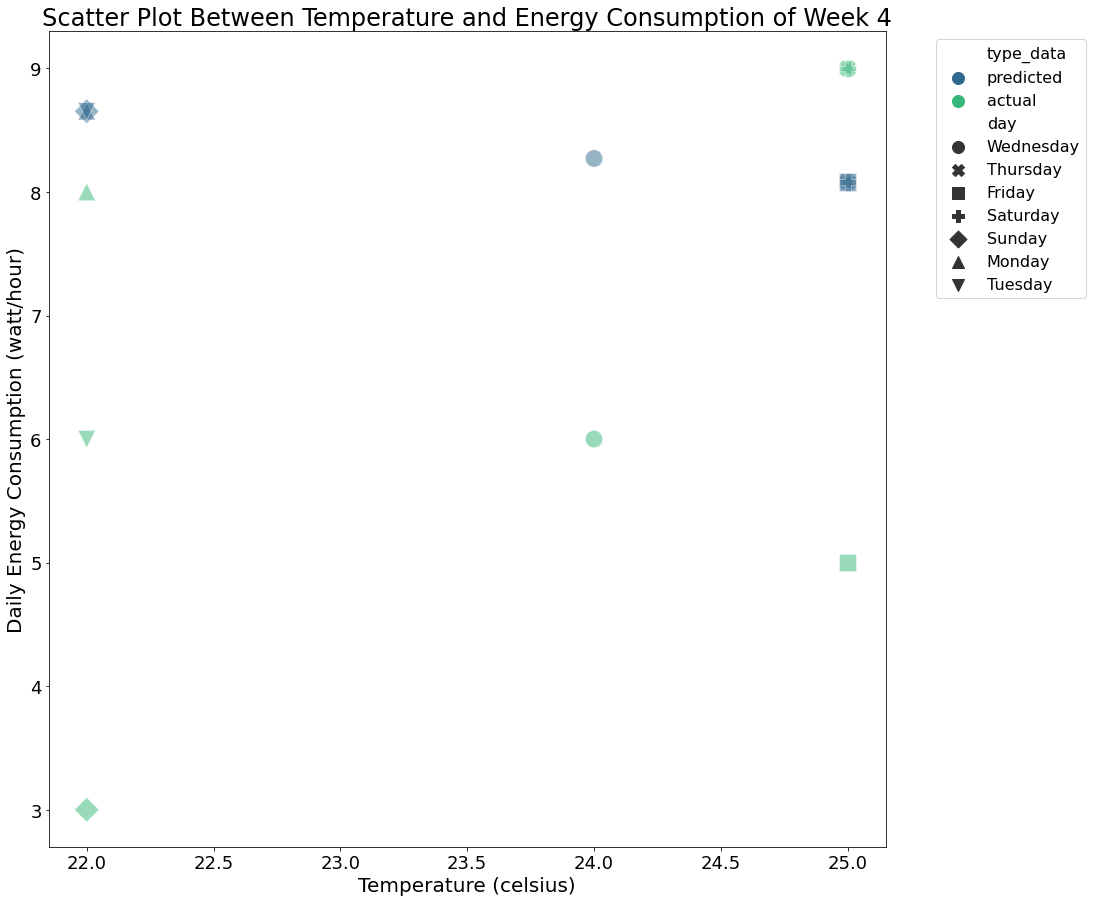

In [54]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_week4_new, x="temperature_celsius", y="daily_energy_consumption_watt_per_hour",palette="viridis",alpha=0.5 ,hue="type_data",style="day",s=300)
plt.xlabel("Temperature (celsius)",size=20)
plt.ylabel("Daily Energy Consumption (watt/hour)",size=20)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Scatter Plot Between Temperature and Energy Consumption of Week 4",size=24)
plt.legend( bbox_to_anchor=(1.05, 1),fontsize=16,markerscale=2)
plt.show()

### The Three Days of Week 5:

The first step is to create a data frame that include data of week 5 only. This time there are only 3 days.

In [55]:
df_week5=df_modified.loc[df_modified["week_number"]==5]
df_week5

day  week_number        date  forecast_temperature_celsius  \
21  Wednesday            5  11/18/2020                            25   
22   Thursday            5  11/19/2020                            23   
23     Friday            5  11/20/2020                            21   

    predicted_daily_energy_consumption_watt_per_hour  \
21                                          7.437928   
22                                          7.378886   
23                                          7.319844   

    actual_temperature_celsius  actual_daily_energy_consumption_watt_per_hour  
21                          25                                              5  
22                          23                                              2  
23                          21                                              2

##### Time Series of The Predicted Daily Energy Consumption Against The Actual Data

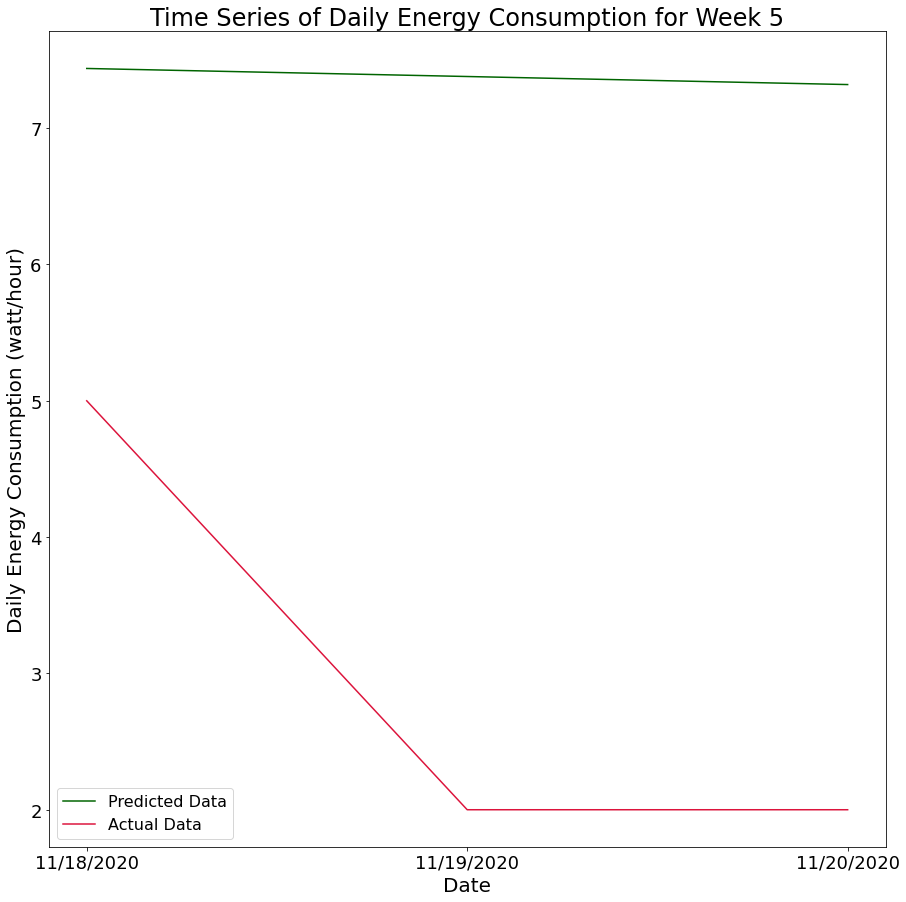

In [56]:
plt.figure(figsize=(15,15))
plt.plot(df_week5["date"], df_week5['predicted_daily_energy_consumption_watt_per_hour'], label = "Predicted Data",c="darkgreen")
plt.plot(df_week5["date"], df_week5['actual_daily_energy_consumption_watt_per_hour'], label = "Actual Data",c="crimson")
plt.xlabel("Date",size=20)
plt.ylabel("Daily Energy Consumption (watt/hour)",size=20)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Time Series of Daily Energy Consumption for Week 5",size=24)
plt.legend(fontsize=16)
plt.show()

##### Scatter Plot Between The Temperature and The Daily Energy Consumption

Some manipulation will take place in order to use the type of data (predicted or actual) as hue

In [57]:
df_week5["forecast_temperature_celsius"].equals(df_week5["actual_temperature_celsius"])

True

The code above shows that the forecast temperature and the actual temperature have the same values. Now, we will add a new column named type of data (it will be either predicted or actual) and both columns predicted_daily_energy_consumption_watt_per_hour and actual_daily_energy_consumption_watt_per_hour will be placed in the same column with with respective to the rest of data. There will be duplication in some columns, but this data frame will be used to get scatter plot that includes both the predicted and actual daily energy consumption.

In [58]:
df_week5_new=df_week5
predicted=df_week5_new["predicted_daily_energy_consumption_watt_per_hour"]
actual=df_week5_new["actual_daily_energy_consumption_watt_per_hour"]
df_week5_new.drop(columns=["predicted_daily_energy_consumption_watt_per_hour","actual_daily_energy_consumption_watt_per_hour"],inplace=True)

C:\Users\monaa\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
df_week5_new

day  week_number        date  forecast_temperature_celsius  \
21  Wednesday            5  11/18/2020                            25   
22   Thursday            5  11/19/2020                            23   
23     Friday            5  11/20/2020                            21   

    actual_temperature_celsius  
21                          25  
22                          23  
23                          21

Since both the forecast temperature and actual temperature have the same values, the two columns can remain in the data frame or one can be dropped to reduce redundant data.

In [60]:
df_week5_new.drop(columns=["forecast_temperature_celsius"],inplace=True)
df_week5_new

day  week_number        date  actual_temperature_celsius
21  Wednesday            5  11/18/2020                          25
22   Thursday            5  11/19/2020                          23
23     Friday            5  11/20/2020                          21

In [61]:
daily_energy_consumption = [*predicted, *actual]
daily_energy_consumption

[7.4379276637341105, 7.378885630498531, 7.31984359726295, 5, 2, 2]

The first 3 numbers are the predicted daily energy consumption starting from Wednesday to Friday respectively.The last 3 numbers are the actual daily energy consumption starting from Wednesday to Friday respectively

In [62]:
type_data=np.array([])
for i in np.arange(3):
    type_data=np.append(type_data,"predicted")
for i in np.arange(3):
    type_data=np.append(type_data,"actual")

Now, we should replicate the rows in df_week5_new so that the first 3 rows are for predicted and the last 3 are for the actual data.

In [63]:
df_week5_new = pd.concat([df_week5_new, df_week5_new])
df_week5_new.reset_index(drop=True)

day  week_number        date  actual_temperature_celsius
0  Wednesday            5  11/18/2020                          25
1   Thursday            5  11/19/2020                          23
2     Friday            5  11/20/2020                          21
3  Wednesday            5  11/18/2020                          25
4   Thursday            5  11/19/2020                          23
5     Friday            5  11/20/2020                          21

In [64]:
df_week5_new.insert(4,"daily_energy_consumption_watt_per_hour",daily_energy_consumption)

In [65]:
df_week5_new.insert(5,"type_data",type_data)

In [66]:
df_week5_new

day  week_number        date  actual_temperature_celsius  \
21  Wednesday            5  11/18/2020                          25   
22   Thursday            5  11/19/2020                          23   
23     Friday            5  11/20/2020                          21   
21  Wednesday            5  11/18/2020                          25   
22   Thursday            5  11/19/2020                          23   
23     Friday            5  11/20/2020                          21   

    daily_energy_consumption_watt_per_hour  type_data  
21                                7.437928  predicted  
22                                7.378886  predicted  
23                                7.319844  predicted  
21                                5.000000     actual  
22                                2.000000     actual  
23                                2.000000     actual

In [67]:
names={"actual_temperature_celsius":"temperature_celsius"}

In [68]:
df_week5_new.rename(columns=names,inplace=True)

Now, we can use the data frame df_week5_new to get a scatter plot that includes both the predicted and actual daily energy consumption

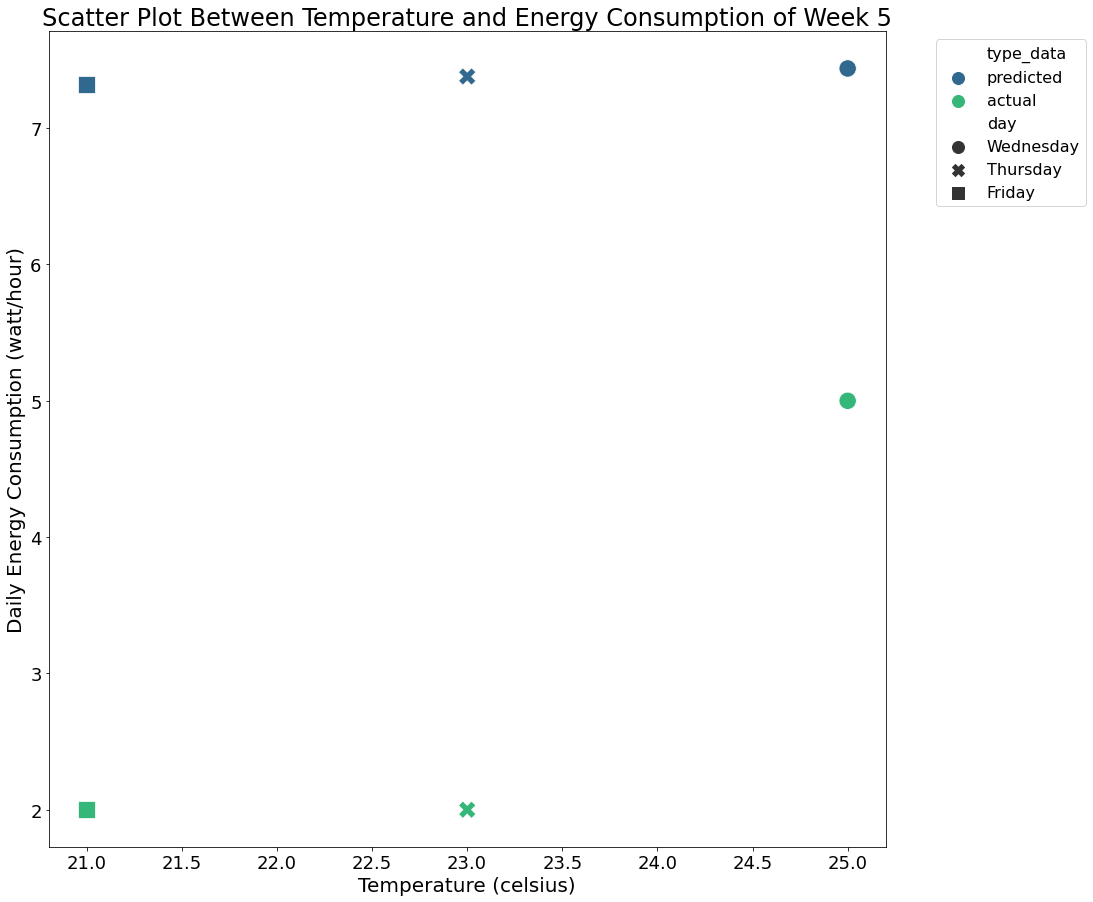

In [69]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_week5_new, x="temperature_celsius", y="daily_energy_consumption_watt_per_hour",palette="viridis",hue="type_data",style="day",s=300)
plt.xlabel("Temperature (celsius)",size=20)
plt.ylabel("Daily Energy Consumption (watt/hour)",size=20)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Scatter Plot Between Temperature and Energy Consumption of Week 5",size=24)
plt.legend( bbox_to_anchor=(1.05, 1),fontsize=16,markerscale=2)
plt.show()

### The Additional Week (Week 6):

The first step is to create a data frame that include data of week 6 only.

In [70]:
df_week6=df_modified.loc[df_modified["week_number"]==6]
df_week6

day  week_number        date  forecast_temperature_celsius  \
24   Saturday            6  11/21/2020                            20   
25     Sunday            6  11/22/2020                            22   
26     Monday            6  11/23/2020                            23   
27    Tuesday            6  11/24/2020                            23   
28  Wednesday            6  11/25/2020                            21   
29   Thursday            6  11/26/2020                            21   
30     Friday            6  11/27/2020                            21   

    predicted_daily_energy_consumption_watt_per_hour  \
24                                          5.811914   
25                                          6.246749   
26                                          6.464167   
27                                          6.464167   
28                                          6.029332   
29                                          6.029332   
30                                          6.029332   

    actual_temperature_celsius  actual_daily_energy_consumption_watt_per_hour  
24                          20                                              2  
25                          22                                             21  
26                          23                                              8  
27                          23                                              8  
28                          21                                              4  
29                          21                                              5  
30                          21                                              8

##### Time Series of The Predicted Daily Energy Consumption Against The Actual Data

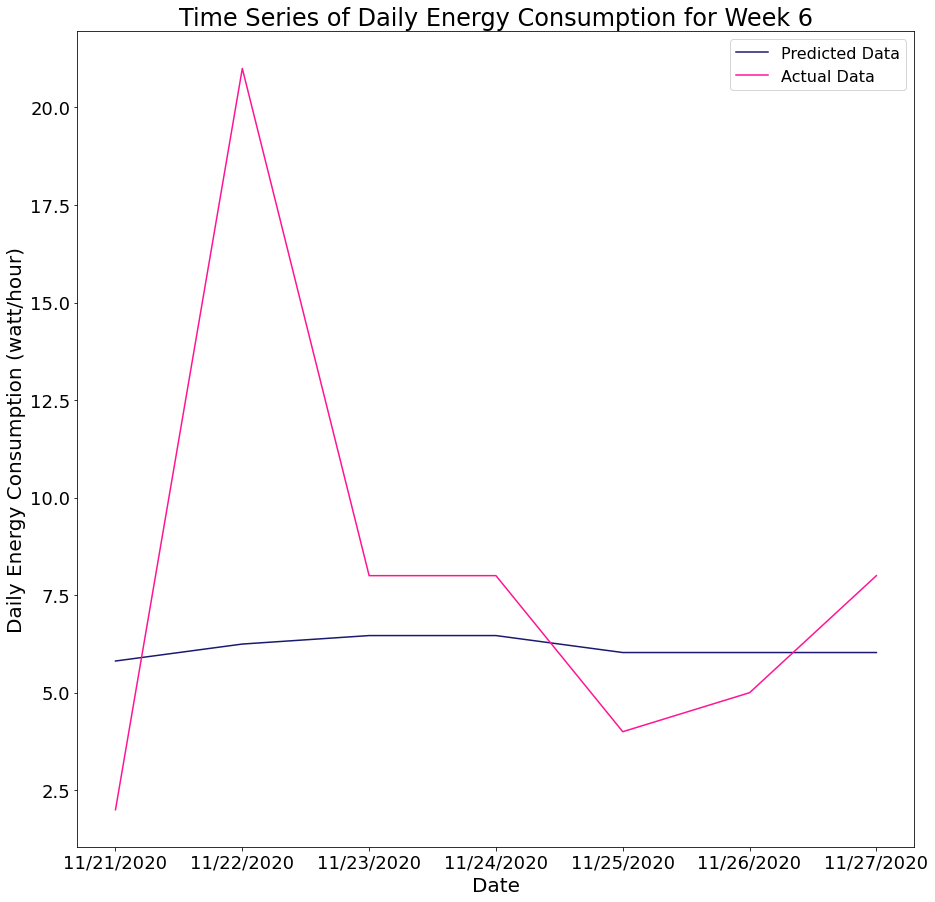

In [71]:
plt.figure(figsize=(15,15))
plt.plot(df_week6["date"], df_week6['predicted_daily_energy_consumption_watt_per_hour'], label = "Predicted Data",c="midnightblue")
plt.plot(df_week6["date"], df_week6['actual_daily_energy_consumption_watt_per_hour'], label = "Actual Data",c="deeppink")
plt.xlabel("Date",size=20)
plt.ylabel("Daily Energy Consumption (watt/hour)",size=20)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Time Series of Daily Energy Consumption for Week 6",size=24)
plt.legend(fontsize=16)
plt.show()

##### Scatter Plot Between The Temperature and The Daily Energy Consumption

Some manipulation will take place in order to use the type of data (predicted or actual) as hue

In [72]:
df_week6["forecast_temperature_celsius"].equals(df_week6["actual_temperature_celsius"])

True

The code above shows that the forecast temperature and the actual temperature have the same values. Now, we will add a new column named type of data (it will be either predicted or actual) and both columns predicted_daily_energy_consumption_watt_per_hour and actual_daily_energy_consumption_watt_per_hour will be placed in the same column with with respective to the rest of data. There will be duplication in some columns, but this data frame will be used to get scatter plot that includes both the predicted and actual daily energy consumption.

In [73]:
df_week6_new=df_week6
predicted=df_week6_new["predicted_daily_energy_consumption_watt_per_hour"]
actual=df_week6_new["actual_daily_energy_consumption_watt_per_hour"]
df_week6_new.drop(columns=["predicted_daily_energy_consumption_watt_per_hour","actual_daily_energy_consumption_watt_per_hour"],inplace=True)

C:\Users\monaa\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [74]:
df_week6_new

day  week_number        date  forecast_temperature_celsius  \
24   Saturday            6  11/21/2020                            20   
25     Sunday            6  11/22/2020                            22   
26     Monday            6  11/23/2020                            23   
27    Tuesday            6  11/24/2020                            23   
28  Wednesday            6  11/25/2020                            21   
29   Thursday            6  11/26/2020                            21   
30     Friday            6  11/27/2020                            21   

    actual_temperature_celsius  
24                          20  
25                          22  
26                          23  
27                          23  
28                          21  
29                          21  
30                          21

Since both the forecast temperature and actual temperature have the same values, the two columns can remain in the data frame or one can be dropped to reduce redundant data.

In [75]:
df_week6_new.drop(columns=["forecast_temperature_celsius"],inplace=True)
df_week6_new

day  week_number        date  actual_temperature_celsius
24   Saturday            6  11/21/2020                          20
25     Sunday            6  11/22/2020                          22
26     Monday            6  11/23/2020                          23
27    Tuesday            6  11/24/2020                          23
28  Wednesday            6  11/25/2020                          21
29   Thursday            6  11/26/2020                          21
30     Friday            6  11/27/2020                          21

In [76]:
daily_energy_consumption = [*predicted, *actual]
daily_energy_consumption

[5.8119141215603305,
 6.2467493196250405,
 6.4641669186574005,
 6.4641669186574005,
 6.02933172059269,
 6.02933172059269,
 6.02933172059269,
 2,
 21,
 8,
 8,
 4,
 5,
 8]

The first 7 numbers are the predicted daily energy consumption starting from Saturday to Friday respectively.The last 7 numbers are the actual daily energy consumption starting from Saturday to Friday respectively

In [77]:
type_data=np.array([])
for i in np.arange(7):
    type_data=np.append(type_data,"predicted")
for i in np.arange(7):
    type_data=np.append(type_data,"actual")

Now, we should replicate the rows in df_week6_new so that the first 7 rows are for predicted and the last 7 are for the actual data.

In [78]:
df_week6_new = pd.concat([df_week6_new, df_week6_new])
df_week6_new.reset_index(drop=True)

day  week_number        date  actual_temperature_celsius
0    Saturday            6  11/21/2020                          20
1      Sunday            6  11/22/2020                          22
2      Monday            6  11/23/2020                          23
3     Tuesday            6  11/24/2020                          23
4   Wednesday            6  11/25/2020                          21
5    Thursday            6  11/26/2020                          21
6      Friday            6  11/27/2020                          21
7    Saturday            6  11/21/2020                          20
8      Sunday            6  11/22/2020                          22
9      Monday            6  11/23/2020                          23
10    Tuesday            6  11/24/2020                          23
11  Wednesday            6  11/25/2020                          21
12   Thursday            6  11/26/2020                          21
13     Friday            6  11/27/2020                          21

In [79]:
df_week6_new.insert(4,"daily_energy_consumption_watt_per_hour",daily_energy_consumption)

In [80]:
df_week6_new.insert(5,"type_data",type_data)

In [81]:
df_week6_new

day  week_number        date  actual_temperature_celsius  \
24   Saturday            6  11/21/2020                          20   
25     Sunday            6  11/22/2020                          22   
26     Monday            6  11/23/2020                          23   
27    Tuesday            6  11/24/2020                          23   
28  Wednesday            6  11/25/2020                          21   
29   Thursday            6  11/26/2020                          21   
30     Friday            6  11/27/2020                          21   
24   Saturday            6  11/21/2020                          20   
25     Sunday            6  11/22/2020                          22   
26     Monday            6  11/23/2020                          23   
27    Tuesday            6  11/24/2020                          23   
28  Wednesday            6  11/25/2020                          21   
29   Thursday            6  11/26/2020                          21   
30     Friday            6  11/27/2020                          21   

    daily_energy_consumption_watt_per_hour  type_data  
24                                5.811914  predicted  
25                                6.246749  predicted  
26                                6.464167  predicted  
27                                6.464167  predicted  
28                                6.029332  predicted  
29                                6.029332  predicted  
30                                6.029332  predicted  
24                                2.000000     actual  
25                               21.000000     actual  
26                                8.000000     actual  
27                                8.000000     actual  
28                                4.000000     actual  
29                                5.000000     actual  
30                                8.000000     actual

In [82]:
names={"actual_temperature_celsius":"temperature_celsius"}

In [83]:
df_week6_new.rename(columns=names,inplace=True)

Now, we can use the data frame df_week6_new to get a scatter plot that includes both the predicted and actual daily energy consumption

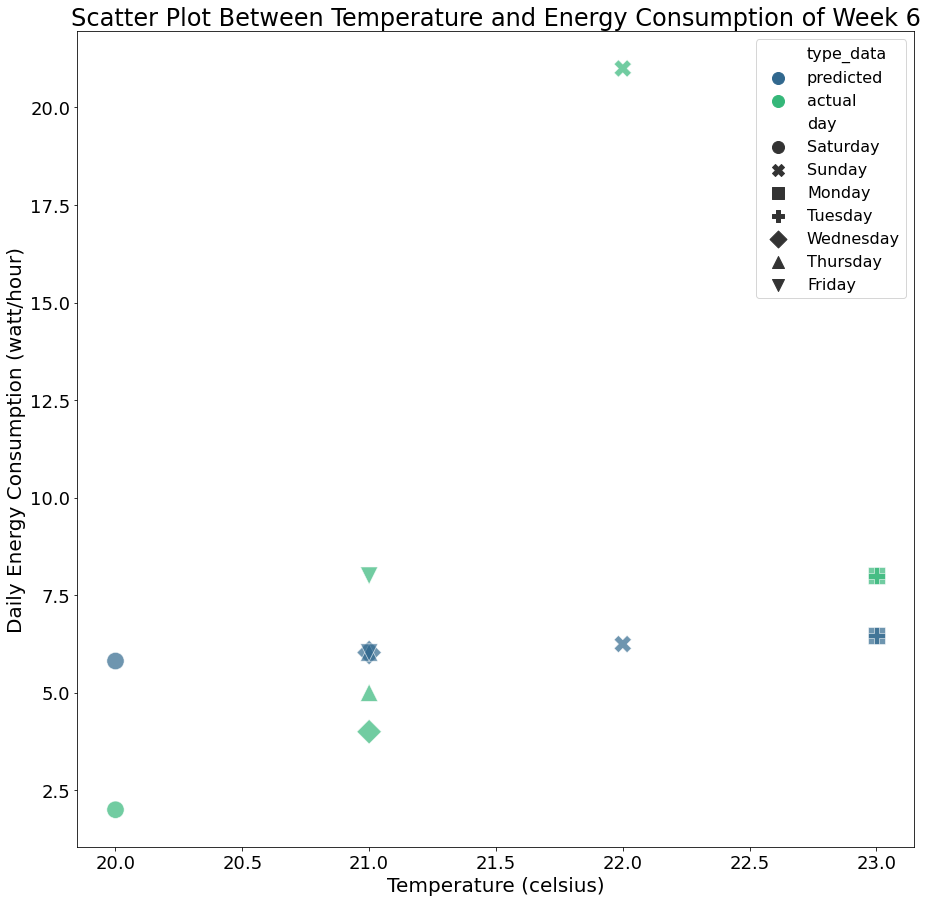

In [84]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_week6_new, x="temperature_celsius", y="daily_energy_consumption_watt_per_hour",palette="viridis",hue="type_data",alpha=0.7,style="day",s=300)
plt.xlabel("Temperature (celsius)",size=20)
plt.ylabel("Daily Energy Consumption (watt/hour)",size=20)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Scatter Plot Between Temperature and Energy Consumption of Week 6",size=24)
plt.legend( bbox_to_anchor=(1, 1),fontsize=16,markerscale=2)
plt.show()

# Clustering Data:-

### First 2 types: Weekdays and Weekends

In [85]:
df_month=pd.read_csv("D:\\Fall 2020\\Data Visualization\\Project\\raw.data.csv")
df_month.head()

Day Number  Week Number        Day Day Type        Date    Month Time (pm)  \
0           1            1  Wednesday   Cloudy  10/21/2020  October      1:00   
1           2            1   Thursday    Sunny  10/22/2020  October      1:00   
2           3            1     Friday    Sunny  10/23/2020  October      1:00   
3           4            1   Saturday    Sunny  10/24/2020  October      1:00   
4           5            1     Sunday   Cloudy  10/25/2020  October      1:00   

   Temperature(celsius)  Meter Reading (watt/hour)  
0                    31                      83735  
1                    31                      83745  
2                    31                      83750  
3                    27                      83763  
4                    27                      83783

In [86]:
df_add=pd.read_csv("D:\\Fall 2020\\Data Visualization\\Project\\additional week.csv")
df_add

Day Number  Week Number        Day Day Type        Date     Month  \
0          32            6   Saturday   Cloudy  11/21/2020  November   
1          33            6     Sunday    Sunny  11/22/2020  November   
2          34            6     Monday    Sunny  11/23/2020  November   
3          35            6    Tuesday    Sunny  11/24/2020  November   
4          36            6  Wednesday   Cloudy  11/25/2020  November   
5          37            6   Thursday   Cloudy  11/26/2020  November   
6          38            6     Friday   Cloudy  11/27/2020  November   

  Time (pm)  Temperature(celsius)  Meter Reading (watt/hour)  
0      1:00                    20                      83955  
1      1:00                    22                      83976  
2      1:00                    23                      83984  
3      1:00                    23                      83992  
4      1:00                    21                      83996  
5      1:00                    21                      84001  
6      1:00                    21                      84009

In [87]:
df2 = pd.concat([df_month, df_add])
df2.head()

Day Number  Week Number        Day Day Type        Date    Month Time (pm)  \
0           1            1  Wednesday   Cloudy  10/21/2020  October      1:00   
1           2            1   Thursday    Sunny  10/22/2020  October      1:00   
2           3            1     Friday    Sunny  10/23/2020  October      1:00   
3           4            1   Saturday    Sunny  10/24/2020  October      1:00   
4           5            1     Sunday   Cloudy  10/25/2020  October      1:00   

   Temperature(celsius)  Meter Reading (watt/hour)  
0                    31                      83735  
1                    31                      83745  
2                    31                      83750  
3                    27                      83763  
4                    27                      83783

In [88]:
energy1=df_energy["energy_consumption"]
energy_week6=df_modified.loc[df_modified["week_number"]==6]
energy2=energy_week6["actual_daily_energy_consumption_watt_per_hour"]
energy =list(pd.concat([energy1, energy2]))

In [89]:
df2.reset_index(drop=True,inplace=True)

In [90]:
df2.insert(9,"daily_energy_consumpion_watt_per_hour",energy)

In [91]:
df2.head()

Day Number  Week Number        Day Day Type        Date    Month Time (pm)  \
0           1            1  Wednesday   Cloudy  10/21/2020  October      1:00   
1           2            1   Thursday    Sunny  10/22/2020  October      1:00   
2           3            1     Friday    Sunny  10/23/2020  October      1:00   
3           4            1   Saturday    Sunny  10/24/2020  October      1:00   
4           5            1     Sunday   Cloudy  10/25/2020  October      1:00   

   Temperature(celsius)  Meter Reading (watt/hour)  \
0                    31                      83735   
1                    31                      83745   
2                    31                      83750   
3                    27                      83763   
4                    27                      83783   

   daily_energy_consumpion_watt_per_hour  
0                                      0  
1                                     10  
2                                      5  
3                                     13  
4                                     20

In [92]:
mylist = []
for i in np.arange(len(df2)):
    if (df2.iloc[i,2]!="Friday") & (df2.iloc[i,2]!="Saturday"):
     {
         mylist.append("WeekDay")
     }   
    else:
     {
         mylist.append("WeekEnd")
     }   

In [93]:
df2.insert(10,"week_day_type",mylist)

In [94]:
df2.head(10)

Day Number  Week Number        Day Day Type        Date    Month Time (pm)  \
0           1            1  Wednesday   Cloudy  10/21/2020  October      1:00   
1           2            1   Thursday    Sunny  10/22/2020  October      1:00   
2           3            1     Friday    Sunny  10/23/2020  October      1:00   
3           4            1   Saturday    Sunny  10/24/2020  October      1:00   
4           5            1     Sunday   Cloudy  10/25/2020  October      1:00   
5           6            1     Monday    Sunny  10/26/2020  October      1:00   
6           7            1    Tuesday    Sunny  10/27/2020  October      1:00   
7           8            2  Wednesday    Sunny  10/28/2020  October      1:00   
8           9            2   Thursday   Cloudy  10/29/2020  October      1:00   
9          10            2     Friday    Sunny  10/30/2020  October      1:00   

   Temperature(celsius)  Meter Reading (watt/hour)  \
0                    31                      83735   
1                    31                      83745   
2                    31                      83750   
3                    27                      83763   
4                    27                      83783   
5                    28                      83787   
6                    28                      83791   
7                    28                      83804   
8                    28                      83809   
9                    28                      83815   

   daily_energy_consumpion_watt_per_hour week_day_type  
0                                      0       WeekDay  
1                                     10       WeekDay  
2                                      5       WeekEnd  
3                                     13       WeekEnd  
4                                     20       WeekDay  
5                                      4       WeekDay  
6                                      4       WeekDay  
7                                     13       WeekDay  
8                                      5       WeekDay  
9                                      6       WeekEnd

In [95]:
minimum_temp=df2["Temperature(celsius)"].min()
maximum_temp=df2["Temperature(celsius)"].max()
minimum_energy=df2["daily_energy_consumpion_watt_per_hour"].min()
maximum_energy=df2["daily_energy_consumpion_watt_per_hour"].max()

In [104]:
fig1=px.scatter(df2,x="Temperature(celsius)",y="daily_energy_consumpion_watt_per_hour",range_y=[minimum_energy-10,maximum_energy+10],
range_x=[minimum_temp-10,maximum_temp+10],animation_frame="Week Number",symbol="week_day_type",color="Day",
          labels={
                     "daily_energy_consumpion_watt_per_hour": "Daily Energy Consumption(watt/hour)",
                     "Day, week_day_type": "Day, Type"
                 },
                title="Scatter Plot Between Temperature and Daily Energy Consumption (WeekDay Type)")
fig1.update_traces(marker=dict(size=15))
fig1.update_layout(
    font_size=18,
    font_family="Courier New",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="red"
)

### Second 2 types: Sunny and Cloudy Days

In [117]:
fig2=px.scatter(df2,x="Temperature(celsius)",y="daily_energy_consumpion_watt_per_hour",range_y=[minimum_energy-10,maximum_energy+10],
range_x=[minimum_temp-10,maximum_temp+10],animation_frame="Week Number",symbol="Day Type",color="Day",
          labels={
                     "daily_energy_consumpion_watt_per_hour": "Daily Energy Consumption(watt/hour)",
                     "Day, week_day_type": "Day, Type"
                 },
                title="Scatter Plot Between Temperature and Daily Energy Consumption (Weather Type)")
fig2.update_traces(marker=dict(size=15))
fig2.update_layout(
    font_size=18,
    font_family="Courier New",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="red"
)

### Code For DashBoard of The 2 Previous Plots

In [233]:
animations = {
    'WeekDay Type': fig1,
    'Weather Type': fig2
}

app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Animated Scatter Plot"),
    dcc.RadioItems(
        id='selection',
        options=[{'label': x, 'value': x} for x in animations],
        value='Scatter'
    ),
    dcc.Graph(id="graph"),
])

@app.callback(
    Output("graph", "figure"), 
    [Input("selection", "value")])
def display_animated_graph(s):
    return animations[s]

app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is run

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Dec/2020 08:31:36] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2020 08:31:36] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2020 08:31:36] "GET /_dash-dependencies HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\monaa\Anaconda3\lib\site-packages\dash\dash.py", line 1076, in dispatch
    response.set_d

127.0.0.1 - - [10/Dec/2020 08:31:36] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [10/Dec/2020 08:31:38] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2020 08:31:39] "POST /_dash-update-component HTTP/1.1" 200 -


### Comparison of energy consumption on weekends to weekdays

In [181]:
fig = px.line(df2, x="Temperature(celsius)", y="daily_energy_consumpion_watt_per_hour", color='week_day_type',title="Line Plot Between Temperature and Daily Energy Consumption")
fig.update_layout(
    font_size=18,
    font_family="Courier New",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="red"
)

In [231]:
all_week_day_type = df2.week_day_type.unique()

app = dash.Dash(__name__)

app.layout = html.Div([    html.H1(children='Line Plot Between Temperature and Daily Energy Consumption'),
        html.Div(children='''
        Line Plot: Showing Different Day Types
    '''),

    dcc.Checklist(
        id="checklist",
        options=[{"label": x, "value": x} 
                 for x in all_week_day_type],
        value=all_week_day_type[3:],
        labelStyle={'display': 'inline-block'}
    ),
    dcc.Graph(id="line-chart"),
])

@app.callback(
    Output("line-chart", "figure"), 
    [Input("checklist", "value")])
def update_line_chart(all_week_day_type):
    mask = df2.week_day_type.isin(all_week_day_type)
    fig = px.line(df2[mask], 
        x="Temperature(celsius)", y="daily_energy_consumpion_watt_per_hour", color='week_day_type',range_y=[minimum_energy-10,maximum_energy+10],
range_x=[minimum_temp-0.5,maximum_temp+0.5])
    return fig

app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is run

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Dec/2020 08:29:53] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2020 08:29:53] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2020 08:29:53] "GET /_dash-dependencies HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\monaa\Anaconda3\lib\site-packages\dash\dash.py", line 1076, in dispatch
    response.set_d

127.0.0.1 - - [10/Dec/2020 08:29:53] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [10/Dec/2020 08:29:55] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2020 08:29:56] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2020 08:29:57] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\monaa\Anaconda3\lib\site-packages\dash\dash.py", line 1076, in dispatch
    response.set_d

127.0.0.1 - - [10/Dec/2020 08:29:58] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [10/Dec/2020 08:29:59] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2020 08:30:00] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2020 08:30:00] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2020 08:30:02] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2020 08:30:03] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\monaa\Anaconda3\lib\site-packages\dash\dash.py", line 1076, in dispatch
    response.set_d

127.0.0.1 - - [10/Dec/2020 08:30:03] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [10/Dec/2020 08:30:04] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2020 08:30:10] "POST /_dash-update-component HTTP/1.1" 200 -


Now, since the line plot did not give us clear visualization, the next attempt is to use a scatter plot.

In [185]:
df_week6_new.type_data.unique()

array(['predicted', 'actual'], dtype=object)

In [232]:
all_week_day_type = df2.week_day_type.unique()

app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children='Scatter Plot Between Temperature and Daily Energy Consumption'),
    html.Div(children='''
        Scatter Plot: Showing Different Day Types
    '''),
    dcc.Checklist(
        id="checklist",
        options=[{"label": x, "value": x} 
                 for x in all_week_day_type],
        value=all_week_day_type[3:],
        labelStyle={'display': 'inline-block'}
    ),
    dcc.Graph(id="scatter"),
])

@app.callback(
    Output("scatter", "figure"), 
    [Input("checklist", "value")])
def update_line_chart(all_week_day_type):
    mask = df2.week_day_type.isin(all_week_day_type)
    fig = px.scatter(df2[mask], 
        x="Temperature(celsius)", y="daily_energy_consumpion_watt_per_hour" ,color='week_day_type',range_y=[minimum_energy-10,maximum_energy+10],
range_x=[minimum_temp-0.5,maximum_temp+0.5])
    return fig

app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is run

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Dec/2020 08:30:20] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2020 08:30:20] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2020 08:30:20] "GET /_dash-dependencies HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\monaa\Anaconda3\lib\site-packages\dash\dash.py", line 1076, in dispatch
    response.set_d

127.0.0.1 - - [10/Dec/2020 08:30:20] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [10/Dec/2020 08:30:22] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2020 08:30:23] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2020 08:30:25] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\monaa\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\monaa\Anaconda3\lib\site-packages\dash\dash.py", line 1076, in dispatch
    response.set_d

127.0.0.1 - - [10/Dec/2020 08:30:26] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [10/Dec/2020 08:30:29] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2020 08:30:32] "POST /_dash-update-component HTTP/1.1" 200 -


The scatterplot in the dashboard shows that the type of weekday does not affect the daily energy consumption.

### Analyses of forecast error compared to the real data for week 21.11 - 27.11

#### Error= The Absolute Value of ((Actual - Forecast)/Actual) * 100

We are interested in getting the error for week 6

In [192]:
df6=df_modified.tail(7)
df6

day  week_number        date  forecast_temperature_celsius  \
24   Saturday            6  11/21/2020                            20   
25     Sunday            6  11/22/2020                            22   
26     Monday            6  11/23/2020                            23   
27    Tuesday            6  11/24/2020                            23   
28  Wednesday            6  11/25/2020                            21   
29   Thursday            6  11/26/2020                            21   
30     Friday            6  11/27/2020                            21   

    predicted_daily_energy_consumption_watt_per_hour  \
24                                          5.811914   
25                                          6.246749   
26                                          6.464167   
27                                          6.464167   
28                                          6.029332   
29                                          6.029332   
30                                          6.029332   

    actual_temperature_celsius  actual_daily_energy_consumption_watt_per_hour  
24                          20                                              2  
25                          22                                             21  
26                          23                                              8  
27                          23                                              8  
28                          21                                              4  
29                          21                                              5  
30                          21                                              8

An attempt to get the error

In [234]:
#error=np.array([])
#for i in np.arange(len(df6)):
#    {
#            #temp=(abs(df6.iloc[i,6]-df6.iloc[i,4]))/(df6.iloc[i,6])
#            np.append(error,abs(df6.iloc[i,6]-df6.iloc[i,4])/(df6.iloc[i,6]))
#    }  
##To find the total error
#total=0
#for i in np.arange(len(df6)):
#    {
#            total = total + error[i]
#    }   
#total_error=total/7 #since there are 7 days
#print("The forecast error for week 21/11 -27/11 is ",total_error," and the percentage error is ",total_error*100)

### Analysis and Conclusion:

From the correlation values that started with having negative correlation between temperature and daily energy consumption and ended with ver weak positive correlation, it can be concluded that there is no evidence that there is a correlation between temperture and energy consumption. More accurate results can be obtained by repeating the process and collecting data for longer time (year instead of month). Moreover, considering the inconsistency of the predicted data with respect to the actual ones, this could be due several errors. First, the meter reading is really old and it is possible that there are some mistakes in the meter readings. Morevover, there can other external factors affecting the daily energy consumption other than the temperature such as number of people found in the house and number of electric appliances used in the day. A similar experiment should be carried out and all these variables should remain constant so that we can get accurate conclusions on whether the temperature is correlated with the daily energy consumption or not.